# p15 - Solve eigenvalue BVP $u_{xx} = \lambda u$, $u(-1)=u(1)=0$

In [8]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import dot,argsort,linspace,shape,zeros,polyval,polyfit,pi,real
from chebPy import cheb
from scipy.linalg import solve,eig
from matplotlib.pyplot import figure,subplot,plot,title,axis

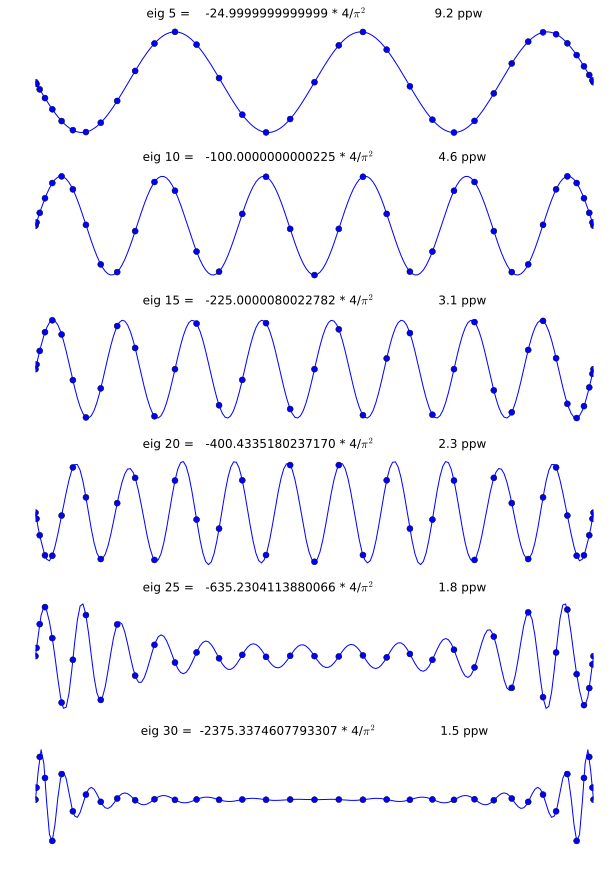

In [9]:
N = 36
D,x = cheb(N)
D2 = dot(D,D)
D2 = D2[1:N,1:N]

lam,V = eig(D2)   
ii = argsort(-lam)
lam = real(lam[ii])
V = V[:,ii]

fig = figure(figsize=(10,15))
for j in range(5,35,5):              
    lv = shape(V)[0]+2
    u = zeros(lv)
    u[1:lv-1] = V[:,int(j)]  
    subplot(6,1,j/5)
    plot(x,u,'bo')
    xx = linspace(-1.0,1.0,201)
    uu = polyval(polyfit(x,u,N),xx)    # interpolate grid data
    s = 'eig %d = %20.13f * 4/$\pi^2$' %(j,lam[j-1]*4/pi**2)
    s = s + '\t\t %4.1f ppw' % (4*N/(pi*j))
    title(s)
    plot(xx,uu,'b')
    axis('off')